In [4]:
#chargement des librairies
import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display
import warnings
import glob
warnings.filterwarnings("ignore", category=FutureWarning)

In [5]:
#store all sounds for training and testing in lists

dog_list = glob.glob("../TP1/dog/*.wav")
dog_list_test = dog_list[:200]
dog_list_train = dog_list[200:400]

cat_list = glob.glob("../TP1/cat/*.wav")
cat_list_train = cat_list[:200]
cat_list_test = cat_list[200:400]

bird_list = glob.glob("../TP1/bird/*.wav")
bird_list_train = bird_list[:200]
bird_list_test = bird_list[200:400]

In [6]:
#compute mfcc for test and train and store them in a list

xTrain = [0 for i in range(600)]
yTrain = [0 for i in range(600)]

xTest = [0 for i in range(600)]

for i in range(200):
    #TRAIN
    y1, sr1 = librosa.load(dog_list_train[i])
    mfcc1 = np.mean(librosa.feature.mfcc(y=y1, sr=sr1, n_mfcc=13), axis=1)
    xTrain[i] = mfcc1.reshape(13)
    
    y1, sr1 = librosa.load(cat_list_train[i])
    mfcc1 = np.mean(librosa.feature.mfcc(y=y1, sr=sr1, n_mfcc=13), axis=1)
    xTrain[200+i] = mfcc1.reshape(13)
    yTrain[200+i] = 1
    
    y1, sr1 = librosa.load(bird_list_train[i])
    mfcc1 = np.mean(librosa.feature.mfcc(y=y1, sr=sr1, n_mfcc=13), axis=1)
    xTrain[400+i] = mfcc1.reshape(13)
    yTrain[400+i] = 2
    
    #TEST
    y1, sr1 = librosa.load(dog_list_test[i])
    mfcc1 = np.mean(librosa.feature.mfcc(y=y1, sr=sr1, n_mfcc=13), axis=1)
    xTest[i] = mfcc1.reshape(13)
    
    y1, sr1 = librosa.load(cat_list_test[i])
    mfcc1 = np.mean(librosa.feature.mfcc(y=y1, sr=sr1, n_mfcc=13), axis=1)
    xTest[200+i] = mfcc1.reshape(13)
    
    y1, sr1 = librosa.load(bird_list_test[i])
    mfcc1 = np.mean(librosa.feature.mfcc(y=y1, sr=sr1, n_mfcc=13), axis=1)
    xTest[400+i] = mfcc1.reshape(13)
    


In [7]:
# Normalization
xTrain = np.array(xTrain)
n = xTrain.shape[0]
mu = np.mean(xTrain, axis=0)
var = np.var(xTrain, axis=0)
sigma_norm = np.sqrt(var)
mad = np.sum(np.abs(xTrain - mu), axis=0) / n

normalized_xTrain = (xTrain - mu) / sigma_norm
standardized_xTrain = (xTrain - mu) / mad

xTest = np.array(xTest)
n = xTest.shape[0]
var = np.var(xTest, axis=0)
sigma_norm_test = np.sqrt(var)
mad_test = np.sum(np.abs(xTest - mu), axis=0) / n

normalized_xTest = (xTest - mu) / sigma_norm_test
standardized_xTest = (xTest - mu) / mad_test

In [8]:
def voteKnn(xtrain, ytrain, nKnn, newData):
    lesDistances = np.sqrt(np.sum((xtrain-newData)*(xtrain-newData),axis=1))
    indices = np.argsort(lesDistances)
    # nKNN smallest distances indices
    nei = indices[:nKnn]
    # nKNN closest data
    xn = xtrain[nei]
    yn = np.array(ytrain)[nei]
    # majority vote for the class
    classes, votes = np.unique(yn, return_counts=True)
    classe = classes[np.argmax(votes)]
    return classe

In [9]:
nKnn_list = [i for i in range(1, 200, 2)]
accuracy_list = []
accuracy_list_normalized = []
accuracy_list_standardized = []


for i in range(len(nKnn_list)):
    nKNN = nKnn_list[i]
    
    confusion_matrix = [[0 for i in range(3)] for i in range(3)]

    yTest = np.zeros(600)
    
    for i in range(len(xTest)):
        yTest[i]=voteKnn(xTrain, yTrain, nKNN, xTest[i])

    
    precision = np.sum(yTest == yTrain) / 600
    
    accuracy_list.append(precision)
    ### normalized
    confusion_matrix = [[0 for i in range(3)] for i in range(3)]

    yTest = np.zeros(600)

    for i in range(len(xTest)):
        yTest[i]=voteKnn(normalized_xTrain, yTrain, nKNN, normalized_xTest[i])
    
    precision = np.sum(yTest == yTrain) / 600
    
    accuracy_list_normalized.append(precision)
    ###standardized
    confusion_matrix = [[0 for i in range(3)] for i in range(3)]

    yTest = np.zeros(600)
    
    for i in range(len(xTest)):
        yTest[i]=voteKnn(standardized_xTrain, yTrain, nKNN, standardized_xTest[i])
    
    precision = np.sum(yTest == yTrain) / 600
    
    accuracy_list_standardized.append(precision)
    
    

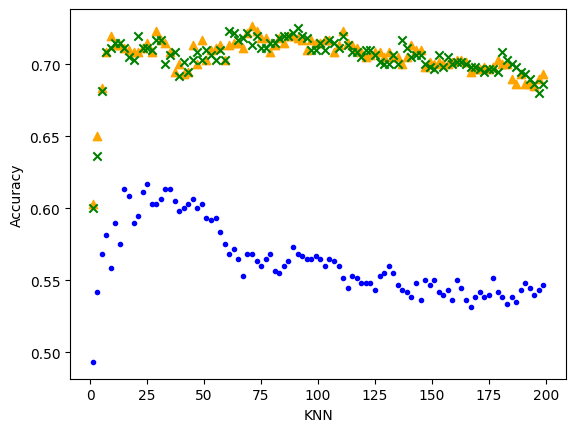

In [10]:
plt.xlabel("KNN")
plt.ylabel("Accuracy")
plt.scatter(nKnn_list, accuracy_list, marker=".", color="blue")

plt.scatter(nKnn_list, accuracy_list_normalized, marker="^", color="orange")

plt.scatter(nKnn_list, accuracy_list_standardized, marker="x", color="green")

In [11]:
cov_matrix = np.cov(standardized_xTrain, rowvar=False)
eigenval, eigenvect = np.linalg.eigh(cov_matrix)
sorted_index = np.argsort(eigenval)
sorted_index = list(reversed(sorted_index))
eigenval = eigenval[sorted_index]
eigenvect = eigenvect[sorted_index]
var = np.sum(eigenval)
eigenval = eigenval[0:2]

print(eigenval)

[6.20626947 3.85625796]
